In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [35]:

# Read the CSV file
df = pd.read_csv(r"CitibikeNYC/DATA_B4_Ridecount.csv", 
                 index_col=0, 
                 low_memory=False)

In [37]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [38]:
df=df.reset_index()

In [39]:
df_sample=df.sample(frac=.01)
df_sample.shape

(2984, 16)

In [40]:
df_sample.isnull().sum()

index                  0
ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name      12
end_station_id        12
start_lat              0
start_lng              0
end_lat                7
end_lng                7
member_casual          0
date                   0
avgTemp                0
dtype: int64

In [41]:
df_sample=df_sample.dropna()

In [42]:
df=df_sample

In [43]:
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')
df.dtypes

index                          int64
ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                          object
avgTemp                      float64
dtype: object

In [132]:
# Group by 'date' and count the 'ride_id' for each day
trips_per_day = df.groupby('date')['ride_id'].count().reset_index()

# Rename the 'ride_id' column to 'trips_per_day' for clarity
trips_per_day = trips_per_day.rename(columns={'ride_id': 'trips_per_day'})

In [138]:
df = pd.merge(df, trips_per_day, on='date', how='left')

In [140]:
df

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,trips_per_day
0,262628,13320FDD1EF9ED8C,classic_bike,2022-11-04 14:04:40.479,2022-11-04 14:08:32.293,Putnam Ave & Ralph Ave,4450.06,Hancock St & Malcolm X Blvd,4342.04,40.687050,-73.923380,40.684870,-73.929300,member,2022-11-04,18.1,13
1,32532,B7CC21621EB5FE67,classic_bike,2022-03-19 14:05:57.490,2022-03-19 14:16:34.471,E 118 St & 1 Ave,7596.1,E 103 St & Lexington Ave,7463.09,40.797470,-73.935040,40.790305,-73.947558,member,2022-03-19,4.3,8
2,219156,AE81A6538D8CE254,electric_bike,2022-09-22 16:44:08.787,2022-09-22 16:53:31.328,Central Park S & 6 Ave,6876.04,W 76 St & Columbus Ave,7281.09,40.765909,-73.976342,40.780184,-73.977285,member,2022-09-22,15.9,15
3,142804,196A2CB55123CE8E,classic_bike,2022-07-17 16:59:51.641,2022-07-17 17:07:19.879,Marcy Ave & Lafayette Ave,4476.03,Halsey St & Tompkins Ave,4319.07,40.690081,-73.947915,40.682369,-73.944118,member,2022-07-17,22.1,12
4,151818,3742C23131616063,classic_bike,2022-07-25 12:36:49.418,2022-07-25 12:43:51.261,Henry St & W 9 St,4086.06,7 St & 3 Ave,3996.01,40.676374,-74.003250,40.672603,-73.989830,member,2022-07-25,22.8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,129931,5A9CE3C9F2EC7146,classic_bike,2022-07-05 10:33:24.562,2022-07-05 10:38:44.467,W 95 St & Broadway,7541.01,Central Park W & W 91 St,7453.01,40.793770,-73.971888,40.788665,-73.966801,casual,2022-07-05,27.4,4
2968,191632,8D56A915311ED07E,classic_bike,2022-08-29 18:31:26.890,2022-08-29 18:59:07.211,Center Blvd & 51 Ave,6179.07,28 St & 41 Ave,6462.19,40.743366,-73.959607,40.751047,-73.937970,casual,2022-08-29,24.6,5
2969,200533,45C48F1CBD3D3661,classic_bike,2022-09-06 13:45:00.723,2022-09-06 13:53:33.287,W 4 St & 7 Ave S,5880.02,University Pl & E 14 St,5905.14,40.734011,-74.002939,40.734814,-73.992085,member,2022-09-06,21.4,8
2970,295527,1ECEE544A3CC1F9E,electric_bike,2022-12-23 21:05:20.589,2022-12-23 21:13:34.759,Washington St & Gansevoort St,6039.06,12 Ave & W 40 St,6765.01,40.738805,-74.008162,40.760875,-74.002777,casual,2022-12-23,-19.9,4


In [142]:
df.to_csv('CitibikeNYC/updated_trips.csv', index=False)

In [44]:
df_temps = pd.read_csv('df_temps.csv', index_col = 0)

In [45]:
temp_df = df_temps.reset_index()
print(temp_df)

           date  avgTemp
0    2022-01-01      2.0
1    2022-01-02     -4.6
2    2022-01-03     -9.2
3    2022-01-04     -3.6
4    2022-01-05     -4.6
..          ...      ...
360  2022-12-27     -9.6
361  2022-12-28     -0.3
362  2022-12-29      9.2
363  2022-12-30      8.7
364  2022-12-31      0.1

[365 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

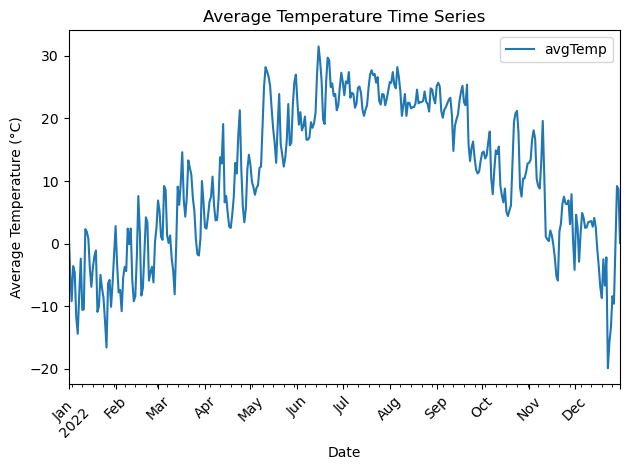

In [46]:
# Step 1: Ensure the index is a datetime object (if not already)
df_temps.index = pd.to_datetime(df_temps.index)

# Step 2: Plot the temperature data as a time series
plt.figure(figsize=(10, 6))
df_temps.plot(y='avgTemp', kind='line')

# Add labels and a title
plt.title('Average Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

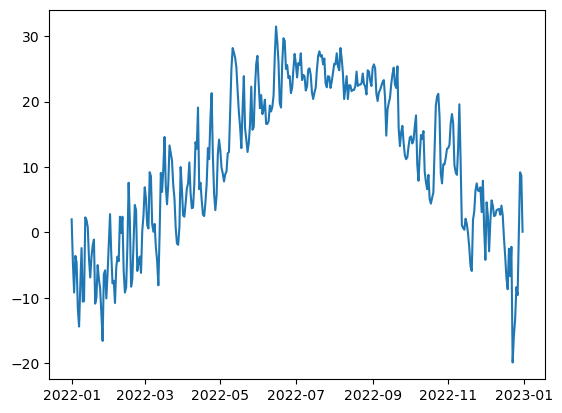

In [47]:
plt.plot(df_temps['avgTemp'])
plt.show()

**3 - Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe**

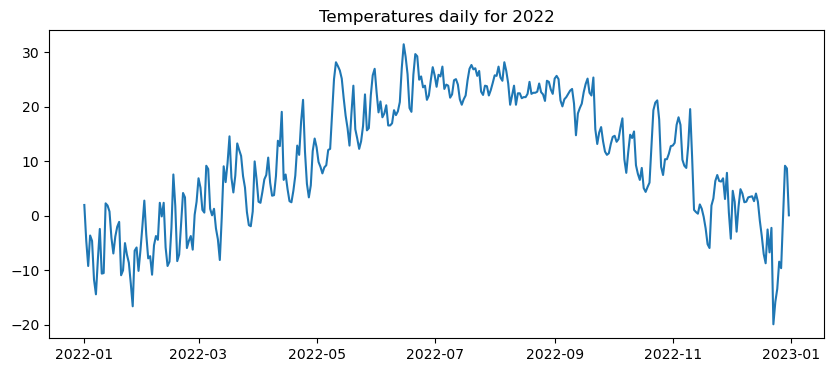

In [49]:
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temps['avgTemp'])
plt.show()

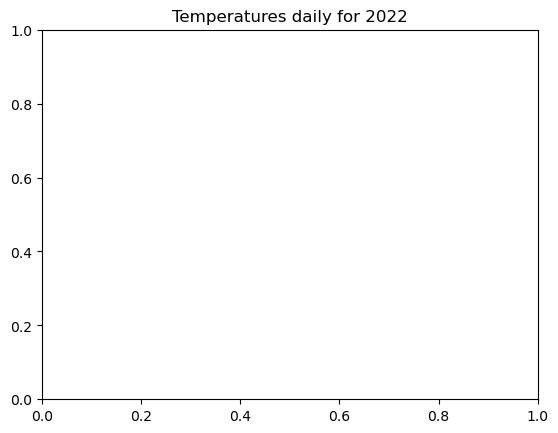

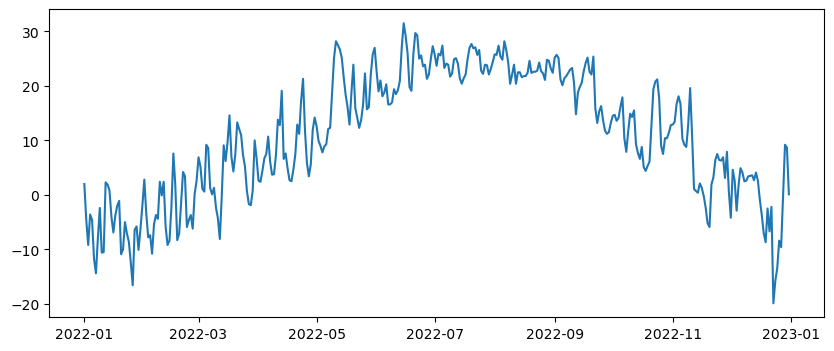

In [50]:
plt.title('Temperatures daily for 2022')
plt.figure(figsize=(10,4))
plt.plot(df_temps['avgTemp'])
plt.show()

**4. Create a column with the count of trips per day and merge it with the weather dataframe:**

In [112]:
trips_per_day = df.groupby('date').count()

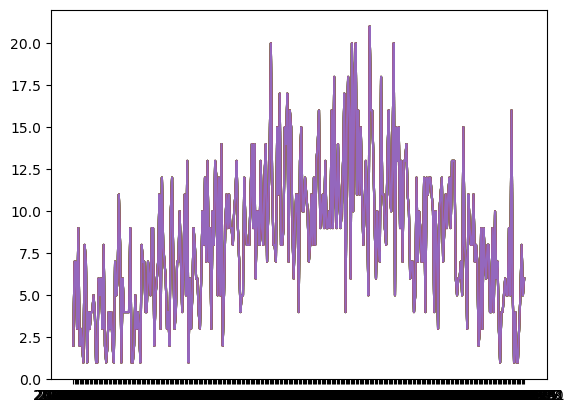

In [114]:
plt.plot(trips_per_day)

In [126]:
merged_df.columns

Index(['index_x', 'ride_id_x', 'rideable_type_x', 'started_at_x', 'ended_at_x',
       'start_station_name_x', 'start_station_id_x', 'end_station_name_x',
       'end_station_id_x', 'start_lat_x', 'start_lng_x', 'end_lat_x',
       'end_lng_x', 'member_casual_x', 'date', 'avgTemp_x', 'index_y',
       'ride_id_y', 'rideable_type_y', 'started_at_y', 'ended_at_y',
       'start_station_name_y', 'start_station_id_y', 'end_station_name_y',
       'end_station_id_y', 'start_lat_y', 'start_lng_y', 'end_lat_y',
       'end_lng_y', 'member_casual_y', 'avgTemp_y'],
      dtype='object')

In [128]:
merged_df = merged_df.drop(['index_y', 'ride_id_y', 'avgTemp_y'], axis=1)

In [130]:
merged_df.columns

Index(['index_x', 'ride_id_x', 'rideable_type_x', 'started_at_x', 'ended_at_x',
       'start_station_name_x', 'start_station_id_x', 'end_station_name_x',
       'end_station_id_x', 'start_lat_x', 'start_lng_x', 'end_lat_x',
       'end_lng_x', 'member_casual_x', 'date', 'avgTemp_x', 'rideable_type_y',
       'started_at_y', 'ended_at_y', 'start_station_name_y',
       'start_station_id_y', 'end_station_name_y', 'end_station_id_y',
       'start_lat_y', 'start_lng_y', 'end_lat_y', 'end_lng_y',
       'member_casual_y'],
      dtype='object')

In [118]:
merged_df

,index_x,ride_id_x,rideable_type_x,started_at_x,ended_at_x,start_station_name_x,start_station_id_x,end_station_name_x,end_station_id_x,start_lat_x,...,start_station_name_y,start_station_id_y,end_station_name_y,end_station_id_y,start_lat_y,start_lng_y,end_lat_y,end_lng_y,member_casual_y,avgTemp_y
0,262628,13320FDD1EF9ED8C,classic_bike,2022-11-04 14:04:40.479,2022-11-04 14:08:32.293,Putnam Ave & Ralph Ave,4450.06,Hancock St & Malcolm X Blvd,4342.04,40.687050,...,13,13,13,13,13,13,13,13,13,13
1,32532,B7CC21621EB5FE67,classic_bike,2022-03-19 14:05:57.490,2022-03-19 14:16:34.471,E 118 St & 1 Ave,7596.1,E 103 St & Lexington Ave,7463.09,40.797470,...,8,8,8,8,8,8,8,8,8,8
2,219156,AE81A6538D8CE254,electric_bike,2022-09-22 16:44:08.787,2022-09-22 16:53:31.328,Central Park S & 6 Ave,6876.04,W 76 St & Columbus Ave,7281.09,40.765909,...,15,15,15,15,15,15,15,15,15,15
3,142804,196A2CB55123CE8E,classic_bike,2022-07-17 16:59:51.641,2022-07-17 17:07:19.879,Marcy Ave & Lafayette Ave,4476.03,Halsey St & Tompkins Ave,4319.07,40.690081,...,12,12,12,12,12,12,12,12,12,12
4,151818,3742C23131616063,classic_bike,2022-07-25 12:36:49.418,2022-07-25 12:43:51.261,Henry St & W 9 St,4086.06,7 St & 3 Ave,3996.01,40.676374,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,129931,5A9CE3C9F2EC7146,classic_bike,2022-07-05 10:33:24.562,2022-07-05 10:38:44.467,W 95 St & Broadway,7541.01,Central Park W & W 91 St,7453.01,40.793770,...,4,4,4,4,4,4,4,4,4,4
2968,191632,8D56A915311ED07E,classic_bike,2022-08-29 18:31:26.890,2022-08-29 18:59:07.211,Center Blvd & 51 Ave,6179.07,28 St & 41 Ave,6462.19,40.743366,...,5,5,5,5,5,5,5,5,5,5
2969,200533,45C48F1CBD3D3661,classic_bike,2022-09-06 13:45:00.723,2022-09-06 13:53:33.287,W 4 St & 7 Ave S,5880.02,University Pl & E 14 St,5905.14,40.734011,...,8,8,8,8,8,8,8,8,8,8
2970,295527,1ECEE544A3CC1F9E,electric_bike,2022-12-23 21:05:20.589,2022-12-23 21:13:34.759,Washington St & Gansevoort St,6039.06,12 Ave & W 40 St,6765.01,40.738805,...,4,4,4,4,4,4,4,4,4,4


In [56]:
df_sample=merged_df.sample(frac=.01)
df_sample.shape

(30, 17)

DF_SAMPLE USE

In [58]:
df_sample.to_csv("ride_data_final.csv")

In [73]:
df_sample

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp_x,avgTemp_y
714,203048,10A738D83E57C3A1,classic_bike,2022-09-08 17:00:35.058,2022-09-08 17:06:40.468,E 22 St & 2 Ave,5971.09,E 4 St & 2 Ave,5593.04,40.737169,-73.981225,40.726281,-73.989780,member,2022-09-08,22.4,18
2466,116887,D9ACDA90EFC0C21D,electric_bike,2022-06-23 09:03:34.316,2022-06-23 09:33:54.850,Clinton St & Joralemon St,4605.04,Broadway & W 29 St,6289.06,40.692395,-73.993379,40.746201,-73.988557,member,2022-06-23,25.0,9
41,274828,7C33A458921326B3,electric_bike,2022-11-17 08:27:49.298,2022-11-17 08:36:37.697,W 168th S & Fort Washington Ave,8226.07,Edgecombe Ave & W 145 St,7976.08,40.842002,-73.942083,40.823498,-73.943860,member,2022-11-17,-0.2,9
1084,251526,51E311C309DDF395,electric_bike,2022-10-25 17:36:40.684,2022-10-25 17:42:51.649,Broadway & W 29 St,6289.06,E 26 St & 3 Ave,6089.11,40.746201,-73.988557,40.740693,-73.981606,member,2022-10-25,17.7,11
1534,62516,3555E3FC61243C80,classic_bike,2022-04-30 15:05:00.003,2022-04-30 15:17:25.807,1 Ave & E 62 St,6753.08,5 Ave & E 72 St,7100.07,40.761227,-73.960940,40.772828,-73.966853,member,2022-04-30,14.2,13
2238,167309,3BE8314D39B5B0F6,classic_bike,2022-08-08 17:43:48.642,2022-08-08 17:48:16.950,31 Ave & 30 St,6857.09,Newtown Ave & 23 St,7026.08,40.764700,-73.924031,40.771361,-73.924615,member,2022-08-08,24.3,10
1671,3846,D717B0CAF44456B8,classic_bike,2022-01-13 19:44:15.941,2022-01-13 19:57:53.941,W 30 St & 10 Ave,6459.07,E 15 St & 3 Ave,5863.07,40.752694,-74.002353,40.734232,-73.986923,casual,2022-01-13,1.9,8
1935,1365,ED5B1043DA490E4B,classic_bike,2022-01-05 16:59:21.391,2022-01-05 17:30:52.712,E 88 St & Park Ave,7293.1,W 100 St & Manhattan Ave,7538.14,40.781411,-73.955959,40.795000,-73.964500,casual,2022-01-05,-4.6,9
628,234798,CF96B29144F2C788,electric_bike,2022-10-08 16:14:38.514,2022-10-08 17:04:16.156,Amsterdam Ave & W 152 St,8069.01,Broadway & W 160 St,8157.06,40.829375,-73.944373,40.835775,-73.943400,casual,2022-10-08,7.9,10
2762,18184,BF42BF4868B2DFE2,electric_bike,2022-02-20 00:01:58.693,2022-02-20 00:15:07.014,West St & Liberty St,5184.08,Grand St & Samuel Dickstein Plaza,5335.07,40.711444,-74.014847,40.715119,-73.984171,member,2022-02-20,-1.4,4
